In [1]:
import pandas as pd
import spacy
from sklearn import model_selection
import numpy as np


from tensorflow import keras
from tensorflow.keras import layers, models

In [2]:
df = pd.read_json(open("../data/data.json", "r", encoding="utf8"))
df.head()

,title,url,author,year,text,themes
0,"[32, 448, 99, 844]",https://poets.org/poem/body-and-soul-ii,601,2002,"[2315, 1039, 2, 2315, 257, 936, 143, 442, 60, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,[2719],https://poets.org/poem/novel,310,2002,"[298, 4288, 1, 2425, 263, 18, 1330, 570, 428, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,[172],https://poets.org/poem/flying,3477,2002,"[13, 668, 11, 1396, 208, 131, 394, 12, 2186, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[1158, 2799, 93, 288, 1104, 2212]",https://poets.org/poem/photograph-people-danci...,2360,2002,"[269, 19, 54, 5, 5, 28, 1282, 2002, 3387, 47, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[230, 1158]",https://poets.org/poem/war-photograph,2124,2002,"[589, 53, 112, 495, 156, 610, 148, 85, 27, 43,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


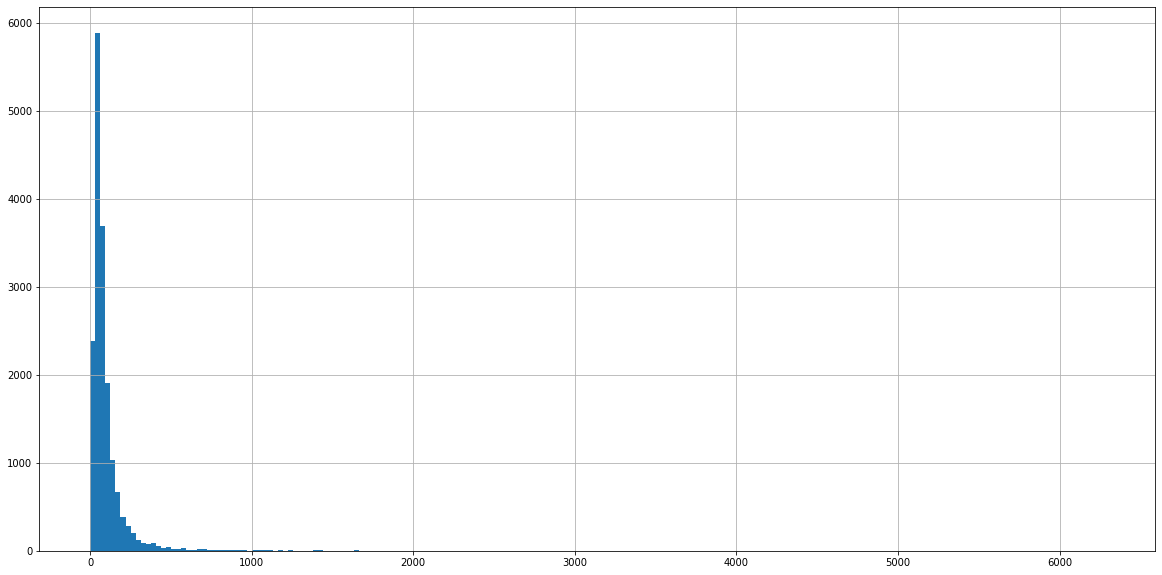

In [3]:
texts_len = df['text'].apply(len)
texts_len.hist(bins=200, figsize=(20, 10))

In [4]:
texts_len = df['text'].apply(len)
df.drop(df[texts_len<50].index, inplace=True)

In [5]:
max_features = 5000  # maximum number of words in vocabulari 5000
max_len = 150  # max length of string
output_dim =100 

In [6]:
joined_text = df['title'] + df['text']
X = keras.preprocessing.sequence.pad_sequences(list(joined_text), maxlen=max_len, padding='post')
Y = np.array(df['themes'].to_list())

In [7]:
df.head()

,title,url,author,year,text,themes
0,"[32, 448, 99, 844]",https://poets.org/poem/body-and-soul-ii,601,2002,"[2315, 1039, 2, 2315, 257, 936, 143, 442, 60, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,[2719],https://poets.org/poem/novel,310,2002,"[298, 4288, 1, 2425, 263, 18, 1330, 570, 428, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,[172],https://poets.org/poem/flying,3477,2002,"[13, 668, 11, 1396, 208, 131, 394, 12, 2186, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[1158, 2799, 93, 288, 1104, 2212]",https://poets.org/poem/photograph-people-danci...,2360,2002,"[269, 19, 54, 5, 5, 28, 1282, 2002, 3387, 47, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[230, 1158]",https://poets.org/poem/war-photograph,2124,2002,"[589, 53, 112, 495, 156, 610, 148, 85, 27, 43,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [8]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
X_test[1]

array([  12,  305,  305,  880,  148,   85,  117,  935,  139, 2422,  533,
        216,  274,  274,    3,  274, 1545,   63, 4401,  556, 1731,  932,
        447, 1242, 2902,   17,  114,  114,  114,  114,    2,  961,  870,
          3,  126,  800,  625,  130, 2798,   14,  172,  441,  554, 4135,
          3,  895,  461, 1103, 2051,   75,  730,  226,   15,    2,  108,
        623,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], d

In [23]:
model = keras.Sequential([
    layers.Embedding(max_features, output_dim, input_length=max_len),
    layers.SpatialDropout1D(0.2),
    layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(153, activation='softmax')
])

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
epochs = 5
batch_size = 128

early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[early_stopping_callback])

Epoch 1/5
65/65 [==============================] - 33s 511ms/step - loss: 5.8298 - accuracy: 0.0930 - val_loss: 5.4557 - val_accuracy: 0.0886
Epoch 2/5
65/65 [==============================] - 30s 466ms/step - loss: 5.4693 - accuracy: 0.0963 - val_loss: 5.5008 - val_accuracy: 0.0886
Epoch 3/5
65/65 [==============================] - 22s 341ms/step - loss: 5.4973 - accuracy: 0.0963 - val_loss: 5.5516 - val_accuracy: 0.0886
Epoch 4/5
65/65 [==============================] - 29s 452ms/step - loss: 5.5269 - accuracy: 0.0963 - val_loss: 5.5719 - val_accuracy: 0.0886


In [26]:
result = model.predict(X_test[8])

In [27]:
result.shape

(150, 153)

In [14]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

72/72 [==============================] - 2s 29ms/step - loss: 5.4814 - accuracy: 0.1042
Test set
  Loss: 5.481
  Accuracy: 0.104


In [15]:
X_test[7]

array([ 262,    4,   30, 4950,    4,  196, 1218,  651, 1218,  788,   21,
       1896,  151,  765, 2111, 2111,  257,  206,  410,   10,   98, 1092,
         10,   98, 2117, 1523,   10,   98,  128,   10,   98,  128,  161,
         14,  202,    3,   14, 3471,  114, 1405,  905,   95,  359,  468,
         78,    4,  209,  366,   58,    4,  123,   30,    4, 2119,  651,
       1218,  651,    4,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], d

In [16]:
inputs = keras.Input(shape=(None,), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
x = layers.Embedding(max_features, output_dim)(inputs)
x = layers.Dropout(0.5)(x)

# Conv1D + global max pooling
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

predictions = layers.Dense(153, activation='sigmoid', name="predictions")(x)

model2 = keras.Model(inputs, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [17]:
model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/5
65/65 [==============================] - 6s 85ms/step - loss: 0.2070 - accuracy: 0.0291 - val_loss: 0.0423 - val_accuracy: 0.0886
Epoch 2/5
65/65 [==============================] - 6s 85ms/step - loss: 0.0520 - accuracy: 0.0629 - val_loss: 0.0407 - val_accuracy: 0.0886
Epoch 3/5
65/65 [==============================] - 6s 86ms/step - loss: 0.0474 - accuracy: 0.0728 - val_loss: 0.0405 - val_accuracy: 0.0886
Epoch 4/5
65/65 [==============================] - 6s 86ms/step - loss: 0.0449 - accuracy: 0.0765 - val_loss: 0.0409 - val_accuracy: 0.0886
Epoch 5/5
65/65 [==============================] - 6s 99ms/step - loss: 0.0431 - accuracy: 0.0798 - val_loss: 0.0410 - val_accuracy: 0.0886


In [18]:
accr = model2.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

72/72 [==============================] - 1s 8ms/step - loss: 0.0423 - accuracy: 0.1042
Test set
  Loss: 0.042
  Accuracy: 0.104


In [21]:
result = model.predict(X_test[8])

In [22]:
result.shape

(150, 153)